# Recommendation System - Project

In [1]:
pip install lightfm

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightfm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path = '/content/drive/MyDrive/Colab Notebooks/Recsy/Lab/Project/h_and_m_data'

#read zip
if False:
  import zipfile
  zip_article = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/Recsy/Lab/Project/h_and_m_data/articles.csv.zip", 'r')
  zip_customer = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/Recsy/Lab/Project/h_and_m_data/customers.csv.zip", 'r')
  zip_transactions = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/Recsy/Lab/Project/h_and_m_data/transactions_train.csv.zip", 'r')

  zip_article.extractall("/content/drive/MyDrive/Colab Notebooks/Recsy")
  zip_customer.extractall("/content/drive/MyDrive/Colab Notebooks/Recsy")
  zip_transactions.extractall("/content/drive/MyDrive/Colab Notebooks/Recsy")
  zip_article.close()
  zip_customer.close()
  zip_transactions.close()


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Recsy'

df_articles = pd.read_csv(path + '/articles.csv')
df_customer = pd.read_csv(path + '/customers.csv')
df_transactions = pd.read_csv(path + '/transactions_train.csv')


# 1: Data Analysis

In [ ]:
df_customer.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
df_articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [ ]:
df_transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [ ]:
#number of unique customers
print('Number of unique customers: ', df_customer['customer_id'].nunique())
#number of unique articles
print('Number of unique articles: ', df_articles['article_id'].nunique())
#number of unique transactions
print('Number of unique articles: ', df_transactions.shape[0])


Number of unique customers:  1371980
Number of unique articles:  105542
Number of unique articles:  31788324


In [ ]:
#check for missing values in %
df_customer.isnull().mean() * 100

customer_id                0.000000
FN                        65.237831
Active                    66.150819
club_member_status         0.441843
fashion_news_frequency     1.167000
age                        1.156066
postal_code                0.000000
dtype: float64

We will likely diregard FN and Active columns since about 65% is missing

In [ ]:
#check for missing values in %
df_articles.isnull().mean() * 100

article_id                      0.000000
product_code                    0.000000
prod_name                       0.000000
product_type_no                 0.000000
product_type_name               0.000000
product_group_name              0.000000
graphical_appearance_no         0.000000
graphical_appearance_name       0.000000
colour_group_code               0.000000
colour_group_name               0.000000
perceived_colour_value_id       0.000000
perceived_colour_value_name     0.000000
perceived_colour_master_id      0.000000
perceived_colour_master_name    0.000000
department_no                   0.000000
department_name                 0.000000
index_code                      0.000000
index_name                      0.000000
index_group_no                  0.000000
index_group_name                0.000000
section_no                      0.000000
section_name                    0.000000
garment_group_no                0.000000
garment_group_name              0.000000
detail_desc     

In [ ]:
#check for missing values in %
df_transactions.isnull().mean() * 100

t_dat               0.0
customer_id         0.0
article_id          0.0
price               0.0
sales_channel_id    0.0
dtype: float64

In [ ]:
#number of interactions per customer
df_transactions['customer_id'].value_counts()

be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
                                                                    ... 
63b70b71291668f0a63ade8e321fb3eccb80eba164f2087dad471de065f18e1f       1
950b172c36d169bf427545991fe66371f21a085799b44780fdcb2da6a3091613       1
7c284f13f4af9d6a53f97279381638ed0cb7afaa4fd4f3eaadc21993ea45fc69       1
62d49d0ae11a4f65fa31e354cb87f6b557ebec648e0e5e71435d2dd190d1ccc4       1
268eaa31a07d6f2f4f060bfcf32a660f3ea3dbb21ef14cd09fc2545f4e0b5c10       1
Name: customer_id, Length: 1362281, dtype: int64

In [ ]:
#number of interactions per article
df_transactions['article_id'].value_counts()

706016001    50287
706016002    35043
372860001    31718
610776002    30199
759871002    26329
             ...  
520736002        1
619777003        1
586904003        1
512385003        1
533261032        1
Name: article_id, Length: 104547, dtype: int64

In [ ]:
# return list of most 5 popular articles
most_pop_articles =  df_transactions['article_id'].value_counts().head(5).index.tolist()
df_articles[df_articles['article_id'].isin(most_pop_articles)]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
1713,372860001,372860,7p Basic Shaftless,302,Socks,Socks & Tights,1010016,Solid,9,Black,...,Shopbasket Socks,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Fine-knit trainer socks in a soft cotton blend.
24837,610776002,610776,Tilly (1),255,T-shirt,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,T-shirt in lightweight jersey with a rounded h...
53892,706016001,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,9,Black,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...
53893,706016002,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,71,Light Blue,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...
70221,759871002,759871,Tilda tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,EQ Divided Basics,D,Divided,2,Divided,80,Divided Complements Other,1002,Jersey Basic,"Cropped, fitted top in cotton jersey with narr..."


In [ ]:
#number of articles per product type
df_articles['product_type_name'].value_counts()

Trousers         11169
Dress            10362
Sweater           9302
T-shirt           7904
Top               4155
                 ...  
Keychain             1
Headband             1
Cushion              1
Blanket              1
Clothing mist        1
Name: product_type_name, Length: 131, dtype: int64

<Axes: >

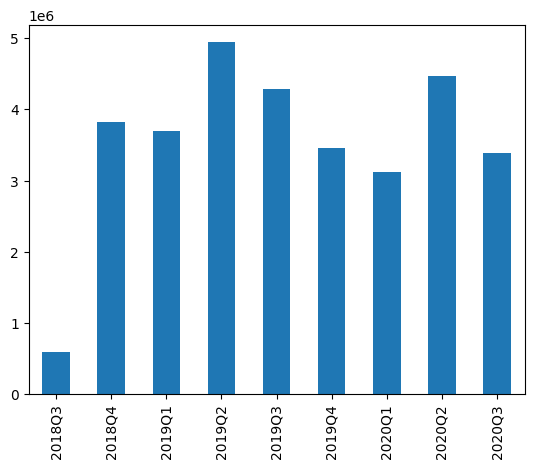

In [ ]:
#plot number of transactions per quarters
df_transactions['date'] = pd.to_datetime(df_transactions['t_dat'])
df_transactions['quarter'] = df_transactions['date'].dt.year.astype(str) + 'Q' + df_transactions['date'].dt.quarter.astype(str)
df_transactions['quarter'].value_counts().sort_index().plot(kind='bar')


<Axes: ylabel='Frequency'>

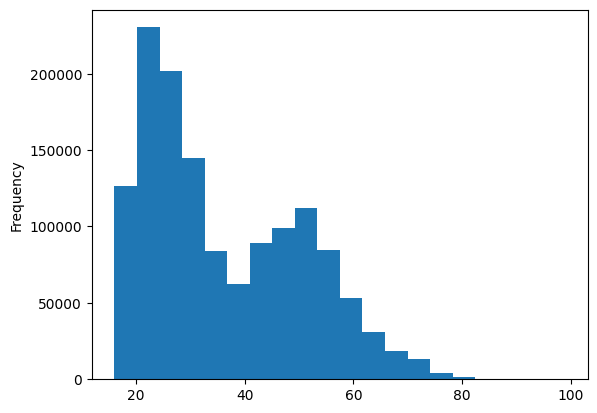

In [ ]:
#plot hist or customers age
df_customer['age'].plot(kind='hist', bins=20)

In [ ]:
df_customer.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

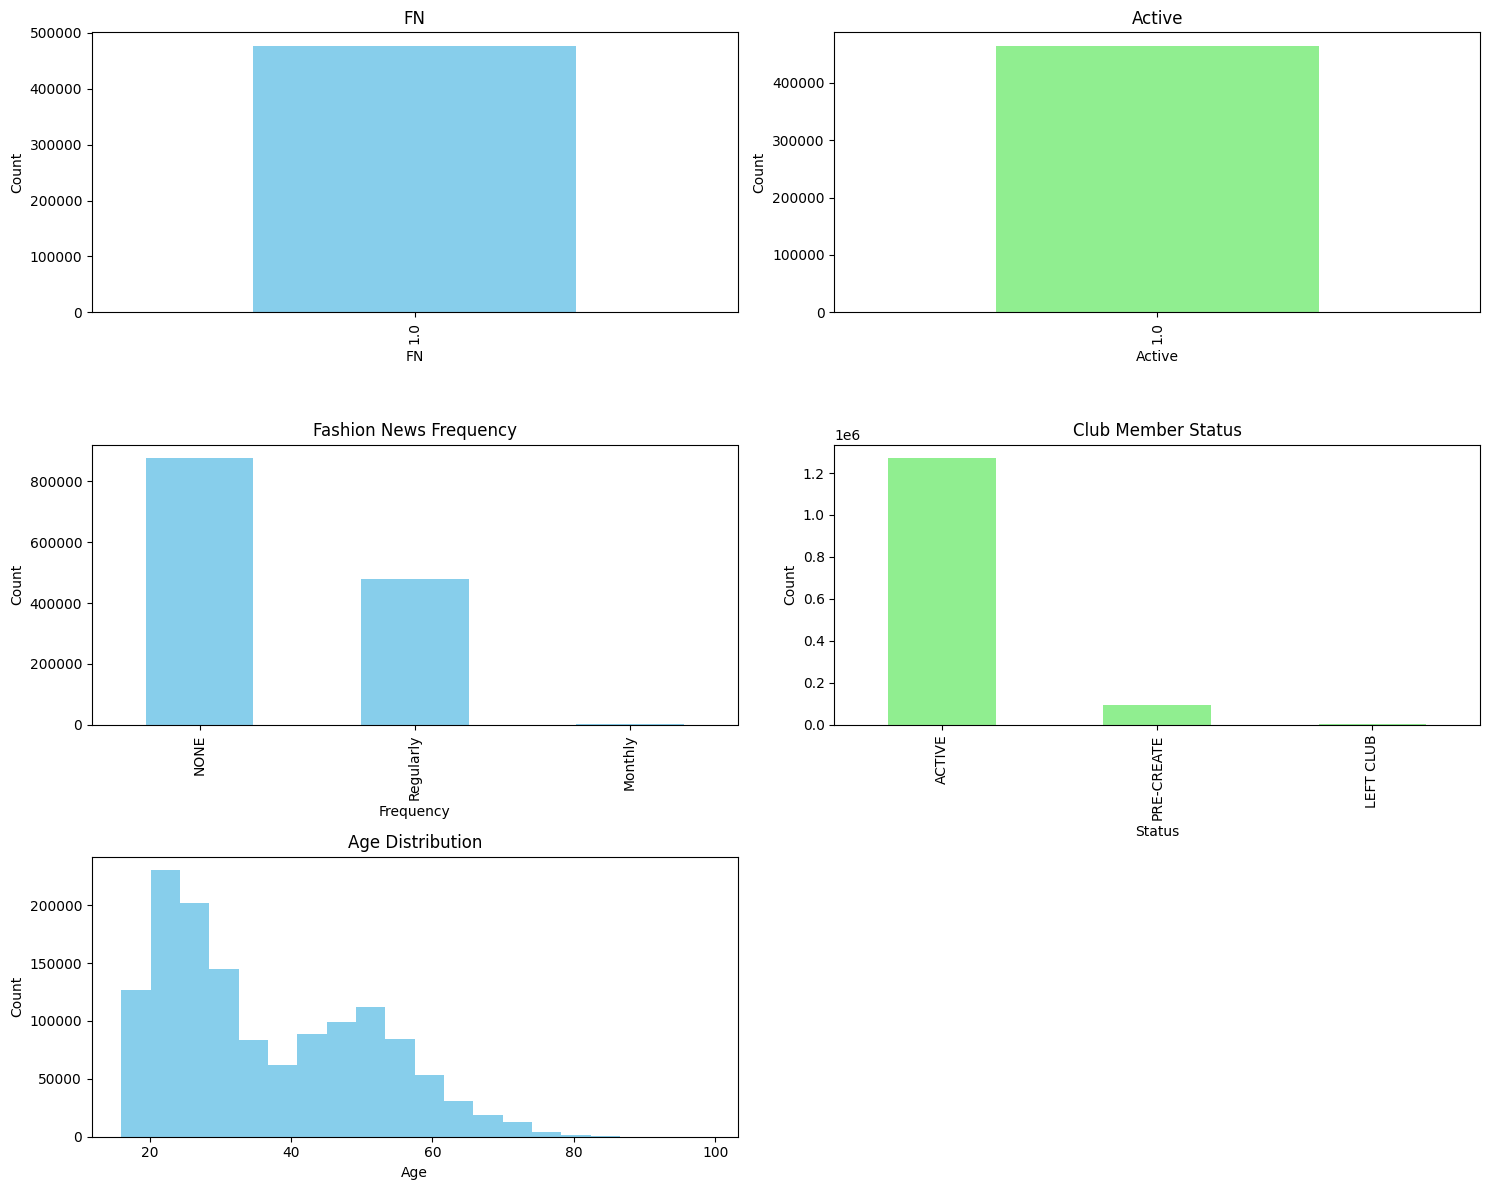

In [ ]:
# Create a figure and axis objects for six subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 12))  # 3 rows, 2 columns

# Plot for 'FN'
df_customer['FN'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('FN')
axes[0, 0].set_xlabel('FN')
axes[0, 0].set_ylabel('Count')

# Plot for 'Active'
df_customer['Active'].value_counts().plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Active')
axes[0, 1].set_xlabel('Active')
axes[0, 1].set_ylabel('Count')

# Plot for 'fashion_news_frequency'
df_customer['fashion_news_frequency'].value_counts().plot(kind='bar', ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Fashion News Frequency')
axes[1, 0].set_xlabel('Frequency')
axes[1, 0].set_ylabel('Count')

# Plot for 'club_member_status'
df_customer['club_member_status'].value_counts().plot(kind='bar', ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Club Member Status')
axes[1, 1].set_xlabel('Status')
axes[1, 1].set_ylabel('Count')

# Plot for 'age'
df_customer['age'].plot(kind='hist', bins=20, ax=axes[2, 0], color='skyblue')
axes[2, 0].set_title('Age Distribution')
axes[2, 0].set_xlabel('Age')
axes[2, 0].set_ylabel('Count')

# Remove the empty subplot in (2, 1)
axes[2, 1].axis('off')  # Optionally, turn off the last unused subplot

# Show the combined plot
plt.tight_layout()
plt.show()

We see that Fn and Active are useless. Fashion News and Status are not disciminative enough.
We may use only the age.

In [ ]:
#sparcity calculation
total_possible_interactions = df_customer.shape[0] * df_articles.shape[0]
actual_interactions = df_transactions.shape[0]
sparsity = 1 - (actual_interactions / total_possible_interactions)

print('Sparsity: ', sparsity)


Sparsity:  0.9997804696697825
The sparsity value of 0.99978 indicates that the user-item interaction matrix is highly sparse. This means that only about 0.022% of the possible user-item combinations have interactions, while 99.978% are zeros (i.e., no interactions). Such high sparsity is common in recommendation system datasets, particularly in scenarios where there are a large number of users and items, but each user interacts with only a small subset of items.


The sparsity value of 0.99978 indicates that the user-item interaction matrix is highly sparse. This means that only about 0.022% of the possible user-item combinations have interactions, while 99.978% are zeros (i.e., no interactions). Such high sparsity is common in recommendation system datasets, particularly in scenarios where there are a large number of users and items, but each user interacts with only a small subset of items.

Implications of High Sparsity
1. Cold Start Problem
2. Overfitting Risk
3. Biased Recommendations

C:\Users\dbenayou\AppData\Local\Temp\ipykernel_7136\3950085702.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions_top_5['quarter'] = pd.to_datetime(df_transactions_top_5['t_dat']).dt.year.astype(str) + 'Q' + pd.to_datetime(df_transactions_top_5['t_dat']).dt.quarter.astype(str)


<Axes: xlabel='quarter'>

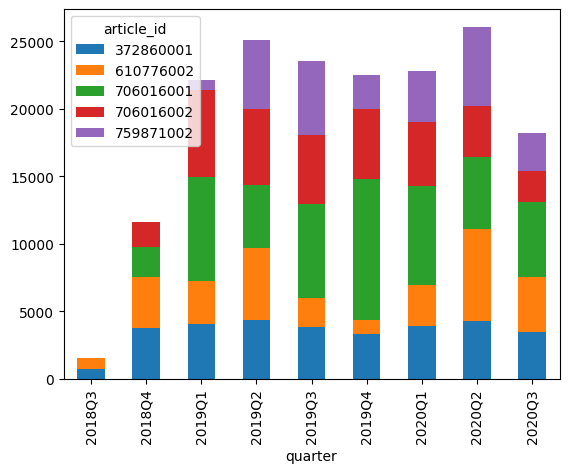

In [ ]:
#historical trend of top 5 articles
top_5_articles = df_transactions['article_id'].value_counts().head(5).index.tolist()
df_transactions_top_5 = df_transactions[df_transactions['article_id'].isin(top_5_articles)]
df_transactions_top_5['quarter'] = pd.to_datetime(df_transactions_top_5['t_dat']).dt.year.astype(str) + 'Q' + pd.to_datetime(df_transactions_top_5['t_dat']).dt.quarter.astype(str)
df_transactions_top_5.groupby(['quarter', 'article_id']).size().unstack().plot(kind='bar', stacked=True)


# 2. Data Sampling

In [ ]:
#based on the date
df_timebasedsample =  df_transactions.copy()
df_timebasedsample['date'] = pd.to_datetime(df_timebasedsample['t_dat'])
df_timebasedsample = df_timebasedsample[df_timebasedsample['date'] > '2020-06-30']

print('Number of unique customers: ', df_timebasedsample.shape[0])

df_timebasedsample.to_csv(path + '/sampling/time_based/' + 'transactions_timebased.csv', index=False)
df_customer[df_customer['customer_id'].isin(df_timebasedsample['customer_id'].unique())].to_csv(path + '/sampling/time_based/' +  'customers_timebased.csv', index=False)
df_articles[df_articles['article_id'].isin(df_timebasedsample['article_id'].unique())].to_csv(path + '/sampling/time_based/' + 'articles_timebased.csv', index=False)

Number of unique customers:  3386963


In [ ]:
# Based on calculated user activity (number of interactions per user)
user_activity = df_transactions['customer_id'].value_counts()

# Define bins for user activity
bins = [0, 5, 20, 100, user_activity.max()]  # Example bins: 0-5, 6-20, 21-100, 100+
labels = ['low', 'medium', 'high', 'very_high']
user_bins = pd.cut(user_activity, bins=bins, labels=labels)

# Sample 10% of users from each bin
sampled_users = pd.concat([
    user_activity[user_bins == label].sample(frac=0.01, random_state=42)
    for label in labels
])

# Filter the original transactions for the sampled users
df_activitysample = df_transactions[df_transactions['customer_id'].isin(sampled_users.index)]

print('Number of sampled users: ', sampled_users.shape[0])

df_activitysample.to_csv(path + '/sampling/activity_based/' +  'transactions_activitybased.csv', index=False)
df_customer[df_customer['customer_id'].isin(df_activitysample['customer_id'].unique())].to_csv(path + '/sampling/activity_based/' + 'customers_activitybased.csv', index=False)
df_articles[df_articles['article_id'].isin(df_activitysample['article_id'].unique())].to_csv(path + '/sampling/activity_based/' + 'articles_activitybased.csv', index=False)


Number of sampled users:  13623


In [ ]:
# Identify the top 20% most popular items
top_items = df_transactions['article_id'].value_counts().head(int(0.2 * len(df_transactions['article_id'].unique()))).index

# Filter transactions to include only those with the top items
df_popularitysample = df_transactions[df_transactions['article_id'].isin(top_items)]

# Optionally, further sample the transactions to make it more manageable
df_popularitysample = df_popularitysample.sample(frac=0.1, random_state=42)

print('Number of transactions in the popularity sample: ', df_popularitysample.shape[0])

df_popularitysample.to_csv(path + '/sampling/popularity_based/' + 'transactions_popularitybased.csv', index=False)
df_customer[df_customer['customer_id'].isin(df_popularitysample['customer_id'].unique())].to_csv(path + '/sampling/popularity_based/' + 'customers_popularitybased.csv', index=False)
df_articles[df_articles['article_id'].isin(df_popularitysample['article_id'].unique())].to_csv(path + '/sampling/popularity_based/' + 'articles_popularitybased.csv', index=False)

Number of transactions in the popularity sample:  2514592


# 3. Data Processing

## 1. Encode Customer and Article IDs

In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/Recsy/sampling/activity_based/'

df_customer_activitysample = pd.read_csv(path + 'customers_activitybased.csv')
df_articles_activitysample = pd.read_csv(path + 'articles_activitybased.csv')
df_activitysample = pd.read_csv(path + 'transactions_activitybased.csv')


In [9]:
#replace nan with mean
df_customer_activitysample['age'].fillna(df_customer_activitysample['age'].mean(), inplace=True)

In [163]:
from lightfm.data import Dataset

dataset = Dataset()
dataset.fit(df_activitysample['customer_id'],
            df_activitysample['article_id'])

In [164]:
num_users, num_items = dataset.interactions_shape()
print('Num users: {}, num_items {}.'.format(num_users, num_items))

Num users: 13623, num_items 52111.


In [165]:
#create article features mapping
dataset.fit_partial(items=df_articles_activitysample['article_id'],
                    users=df_customer_activitysample['customer_id']
                    )

## 2. Create User-Item Interaction Matrix

In [166]:
(interactions, weights) = dataset.build_interactions(((row['customer_id'], row['article_id'])
                                                      for index, row in df_activitysample.iterrows()))

print(repr(interactions))

<13623x52111 sparse matrix of type '<class 'numpy.int32'>'
	with 318671 stored elements in COOrdinate format>


## 3. Building item and customer freatures

# 4. Train Test Split

In [167]:
#train test split
from lightfm.cross_validation import random_train_test_split

train, test = random_train_test_split(interactions, test_percentage=0.2, random_state=np.random.RandomState(42))


# 5. Train Model

In [168]:
from lightfm import LightFM

#train naive model without features
model = LightFM(loss='warp', no_components=10, learning_rate=0.05, random_state=42)
model.fit(train, epochs=50, verbose=True)


Epoch: 100%|██████████| 50/50 [00:15<00:00,  3.17it/s]


# 6. Evaluation

In [169]:
#evaluation on test_interactions
from lightfm.evaluation import precision_at_k, auc_score

auc_train = auc_score(model, train).mean()
auc_test = auc_score(model, test).mean()

print(f"AUC train: {auc_train}")
print(f"AUC test: {auc_test}")

AUC train: 0.9668498039245605
AUC test: 0.7467396259307861


In [139]:
#precision at k routine
precision = precision_at_k(model, test, k=5).mean()

print(f"Precision: {precision}")

Precision: 0.0070949941873550415


Terrible precision

# 7. Prediction

In [20]:
#make an example
score = model.predict(0, [0, 1])
itemid = list(dataset.mapping()[2].keys())[list(dataset.mapping()[2].values()).index(0)]
userid = list(dataset.mapping()[1].keys())[list(dataset.mapping()[1].values()).index(0)]
print("Score for articleid {0} = {1} for customer {2}".format(itemid, score[0], userid))


Score for articleid 621760005 = -1.2238157987594604 for customer 023b48de81f6af9de6bef17e720e3873ce40df3f561c975cfd47eaef5f13d09d


In [140]:
df_articles_activitysample[df_articles_activitysample['article_id'] == itemid]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
10693,621760005,621760,Mix tape Cheeky brief,59,Swimwear bottom,Swimwear,1010016,Solid,9,Black,...,Swimwear,B,Lingeries/Tights,1,Ladieswear,60,"Womens Swimwear, beachwear",1018,Swimwear,Fully lined bikini bottoms with a mid waist an...


In [141]:
df_customer_activitysample[df_customer_activitysample['customer_id'] == userid]

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
126,023b48de81f6af9de6bef17e720e3873ce40df3f561c97...,NaN,NaN,ACTIVE,NONE,19.0,904c14719ceff79ae96915f7bced30556281341fcb8c38...


# 8. Hybrid recommendation with Fetaures


In [142]:
df_articles_activitysample.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [113]:
df_articles_activitysample.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
3,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065011,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,12,Light Beige,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [6]:
#create article features mapping
from lightfm.data import Dataset

dataset = Dataset()

dataset.fit_partial(items=df_articles_activitysample['article_id'],
                    users=df_customer_activitysample['customer_id'],
                    item_features=['product_type_no', 'perceived_colour_value_id', 'index_group_no', 'section_no'],
                    user_features=['age'])

In [10]:
item_feat = df_articles_activitysample[['product_type_no', 'perceived_colour_value_id', 'index_group_no', 'section_no']].to_dict(orient='records')

user_feat = df_customer_activitysample[['age']].to_dict(orient='records')

In [11]:
#building article features
item_features = dataset.build_item_features((x,y) for x,y in zip(df_articles_activitysample['article_id'],item_feat))

#building customer feature
user_features = dataset.build_user_features((x,y) for x,y in zip(df_customer_activitysample['customer_id'], user_feat))

In [12]:
(interactions, weights) = dataset.build_interactions(((row['customer_id'], row['article_id'])
                                                      for index, row in df_activitysample.iterrows()))

print(repr(interactions))

<13623x52111 sparse matrix of type '<class 'numpy.int32'>'
	with 318671 stored elements in COOrdinate format>


In [15]:
#train test split
train, test = random_train_test_split(interactions, test_percentage=0.2, random_state=np.random.RandomState(42))

In [18]:
#train hybrid model with features
model = LightFM(loss='warp', no_components=10, learning_rate=0.05, random_state=42)
model.fit(train, user_features=user_features, item_features=item_features, epochs=50, verbose=True)

Epoch: 100%|██████████| 50/50 [00:27<00:00,  1.84it/s]


In [19]:
#evaluation on test_interactions
from lightfm.evaluation import precision_at_k, auc_score, recall_at_k

auc_train = auc_score(model, train).mean()
auc_test = auc_score(model, test).mean()

print(f"AUC train: {auc_train}")
print(f"AUC test: {auc_test}")

ValueError: Incorrect number of features in item_features

In [128]:
#precision at k routine
precision_test = precision_at_k(model, test, k=5).mean()

print(f"Precision test: {precision_test}")

Precision test: 0.0035772358532994986


In [ ]:
#recall
recall_test = recall_at_k(model, test, k=5).mean()

print(f"Recall test: {recall_test}")

In [124]:
#make an example
score = model.predict(0, [0, 1])
itemid = list(dataset.mapping()[2].keys())[list(dataset.mapping()[2].values()).index(0)]
userid = list(dataset.mapping()[1].keys())[list(dataset.mapping()[1].values()).index(0)]
print("Score for articleid {0} = {1} for customer {2}".format(itemid, score[0], userid))

Score for articleid 621760005 = 0.6537643671035767 for customer 023b48de81f6af9de6bef17e720e3873ce40df3f561c975cfd47eaef5f13d09d
